# Summary

Dans ce notebook, nous allons mettre en pratique les algorithmes de regression sur un jeu de données relatif aux faux billets de banque.

Pour rappel, voici **quelques étapes de travail** d'un **Data Scientist** sont les suivantes:

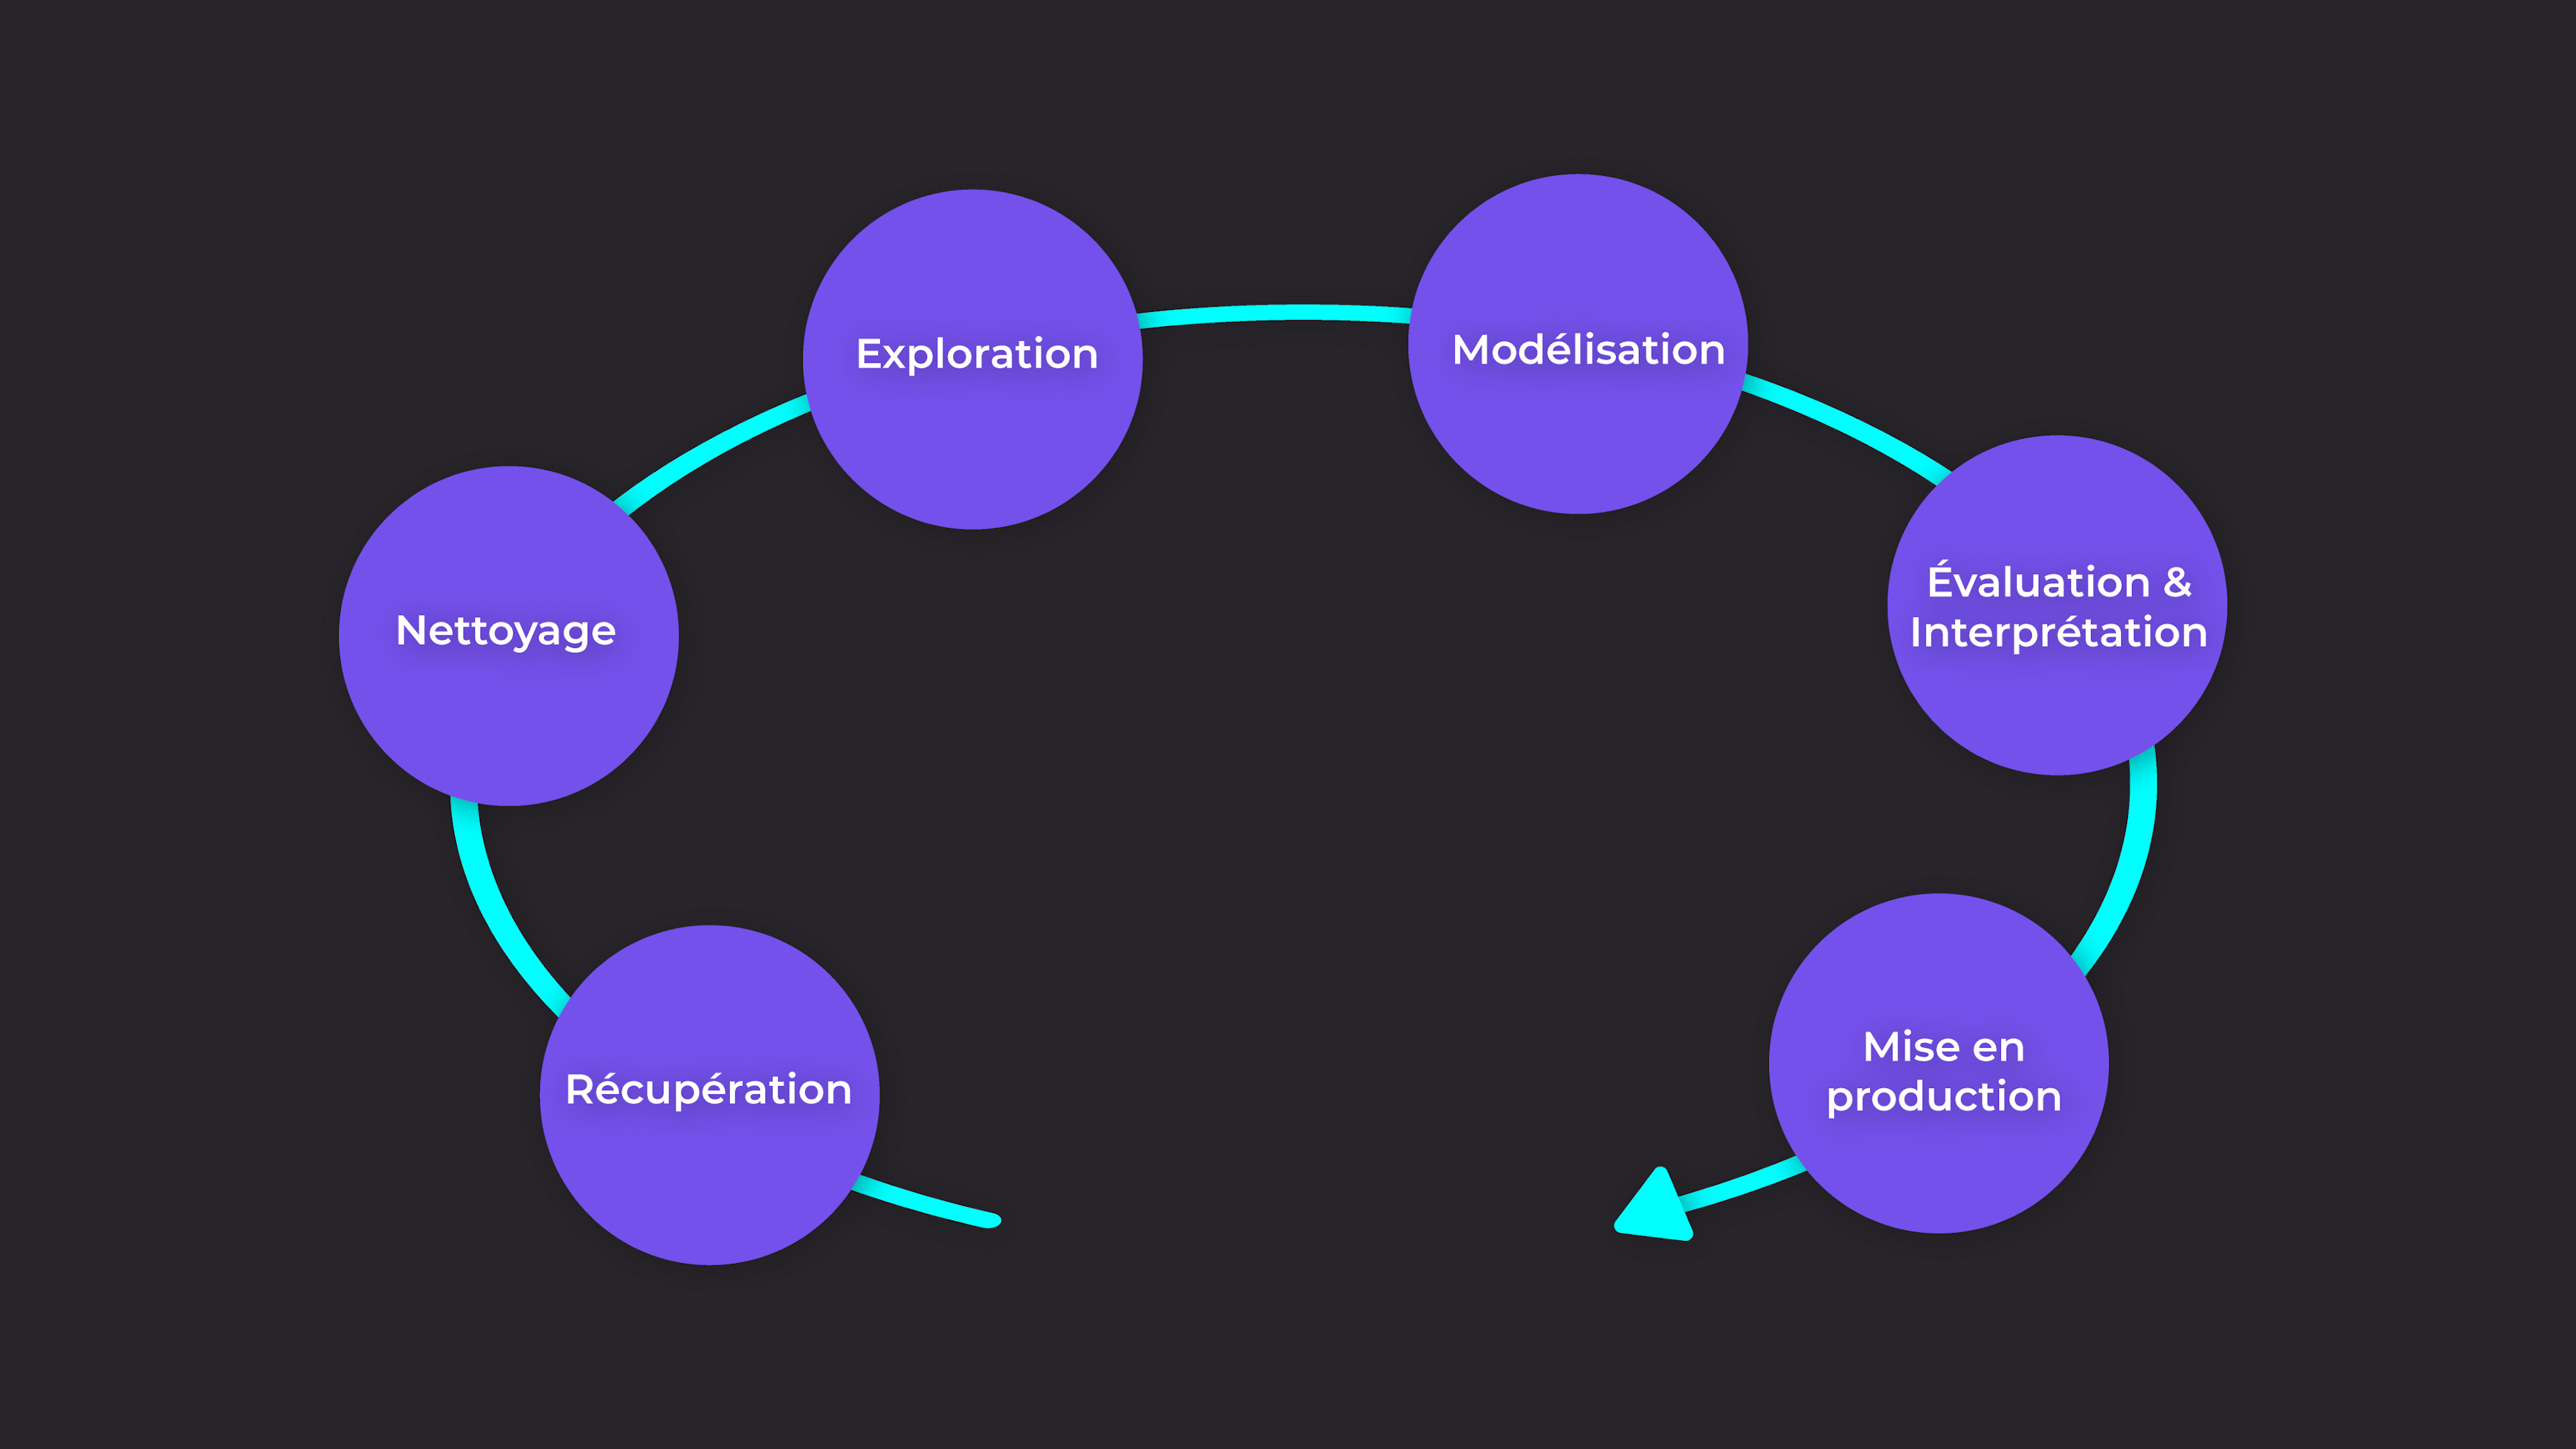

# Packages

In [415]:
import warnings
warnings.filterwarnings('ignore')

In [416]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot


In [550]:
data_link = "https://raw.githubusercontent.com/MouslyDiaw/tp-supervised-learning/refs/heads/master/billets.csv"

In [552]:
data = pd.read_csv(data_link,sep=";")

# Data collection

In [555]:
# Return the first `n` rows, default is 5
data.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [424]:
# Print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [425]:
# Generate descriptive statistics
data.describe(include="all")

is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1463.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.485967   
std           NaN     0.305195     0.299462      0.325627     0.663813   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.015000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean       3.151473   112.67850  
std        0.231813     0.87273  
min        2.270000   109.49000  
25%        2.990000   112.03000  
50%        3.140000   112.96000  
75%        3.310000   113.34000  
max        3.910000   114.44000

# Exploration: EDA (Exploratory Data Analysis)

Explorez les donénes avec les libraires, ex: missingno, plotly, seaborn, ydata-profiling, 

## Missing values

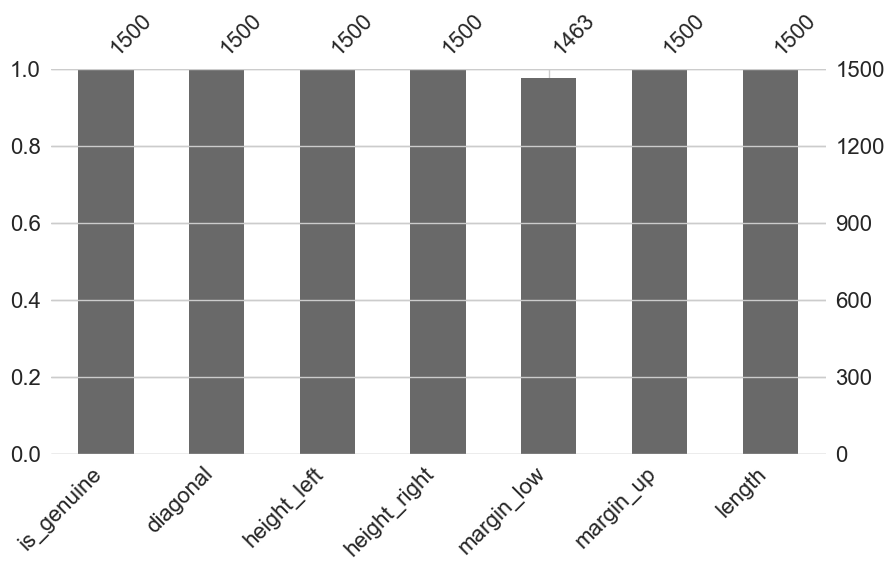

In [429]:
# A bar chart visualization of the nullity of the given DataFrame.
msno.bar(data, figsize=(10, 5));

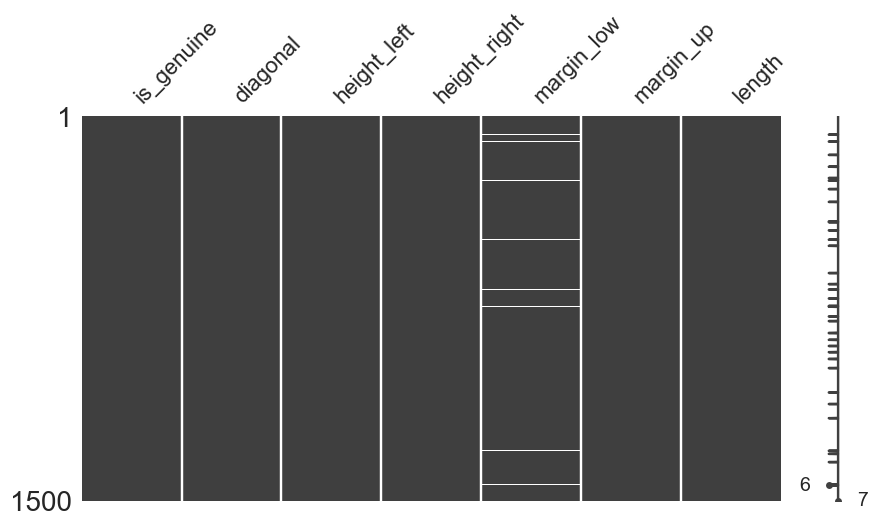

In [430]:
# A matrix visualization of the nullity of the given DataFrame (pick out patterns in data completion).

msno.matrix(data, figsize=(10, 5));

In [431]:
# Return a Series containing counts of unique values.

data.is_genuine.value_counts(dropna=False,  # If True, don't include counts of NaN.
                             normalize=False,  # If True then the object returned will contain the relative frequencies of the unique values.
                            )

is_genuine
True     1000
False     500
Name: count, dtype: int64

## Seaborn

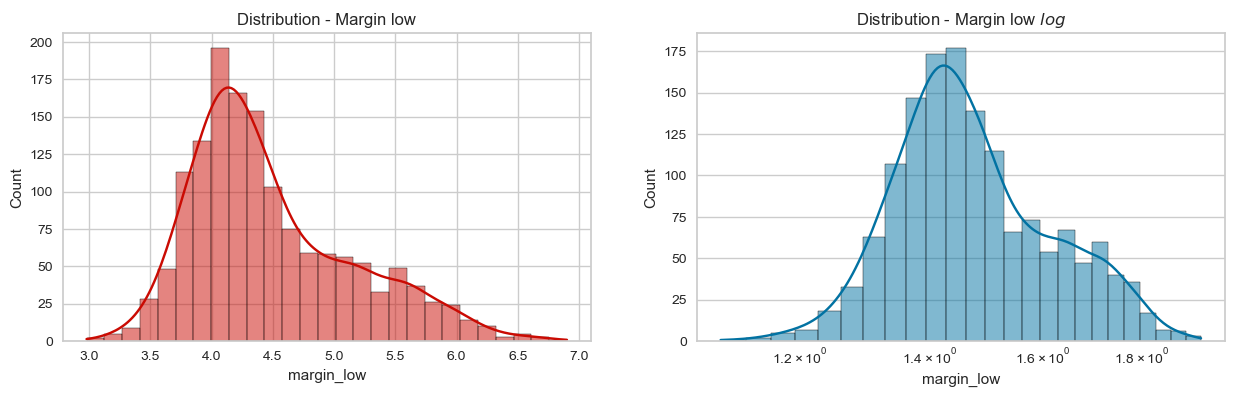

In [433]:
fig,axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(data["margin_low"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - Margin low')

sns.histplot(np.log(data["margin_low"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - Margin low $log$')
axes[1].set_xscale('log');

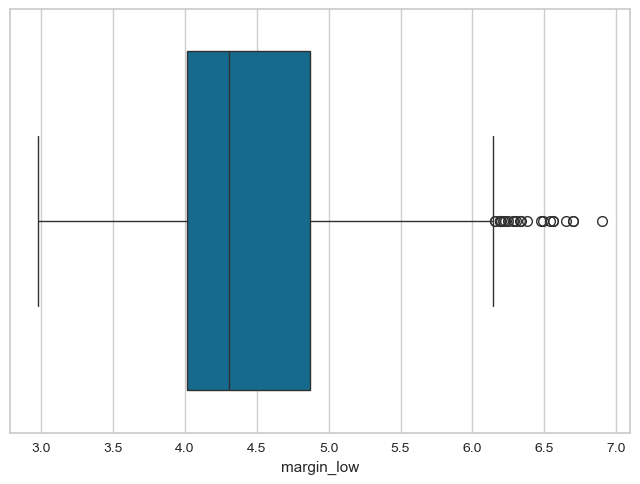

In [434]:
sns.boxplot(data["margin_low"], orient="h");

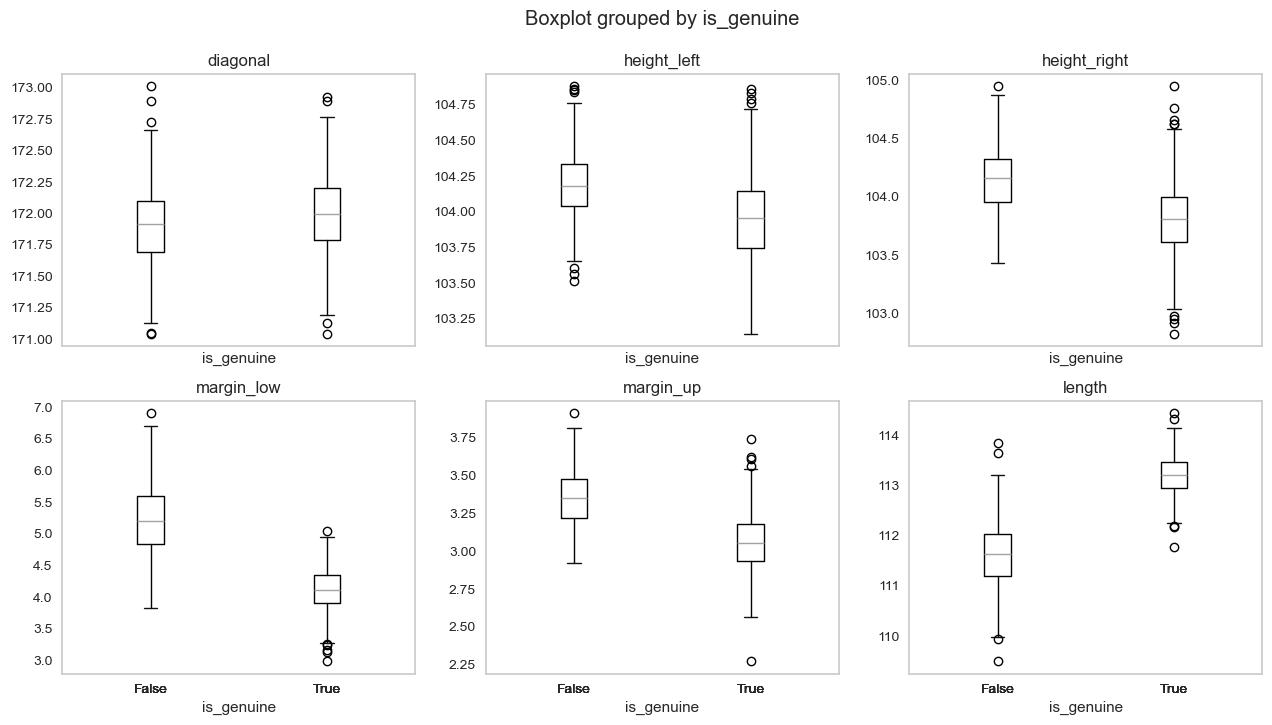

In [435]:
# distribution en fonction du type de billet (Faux vs Vrai)

num_columns = list(data.select_dtypes(include=[int, float]).columns) # extraction des colonnes numériques/décimales
# définition des caratéritiques de graph
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False, sharex=True)
# box plot
data.boxplot(column=num_columns, by="is_genuine", ax=ax, grid=False,);

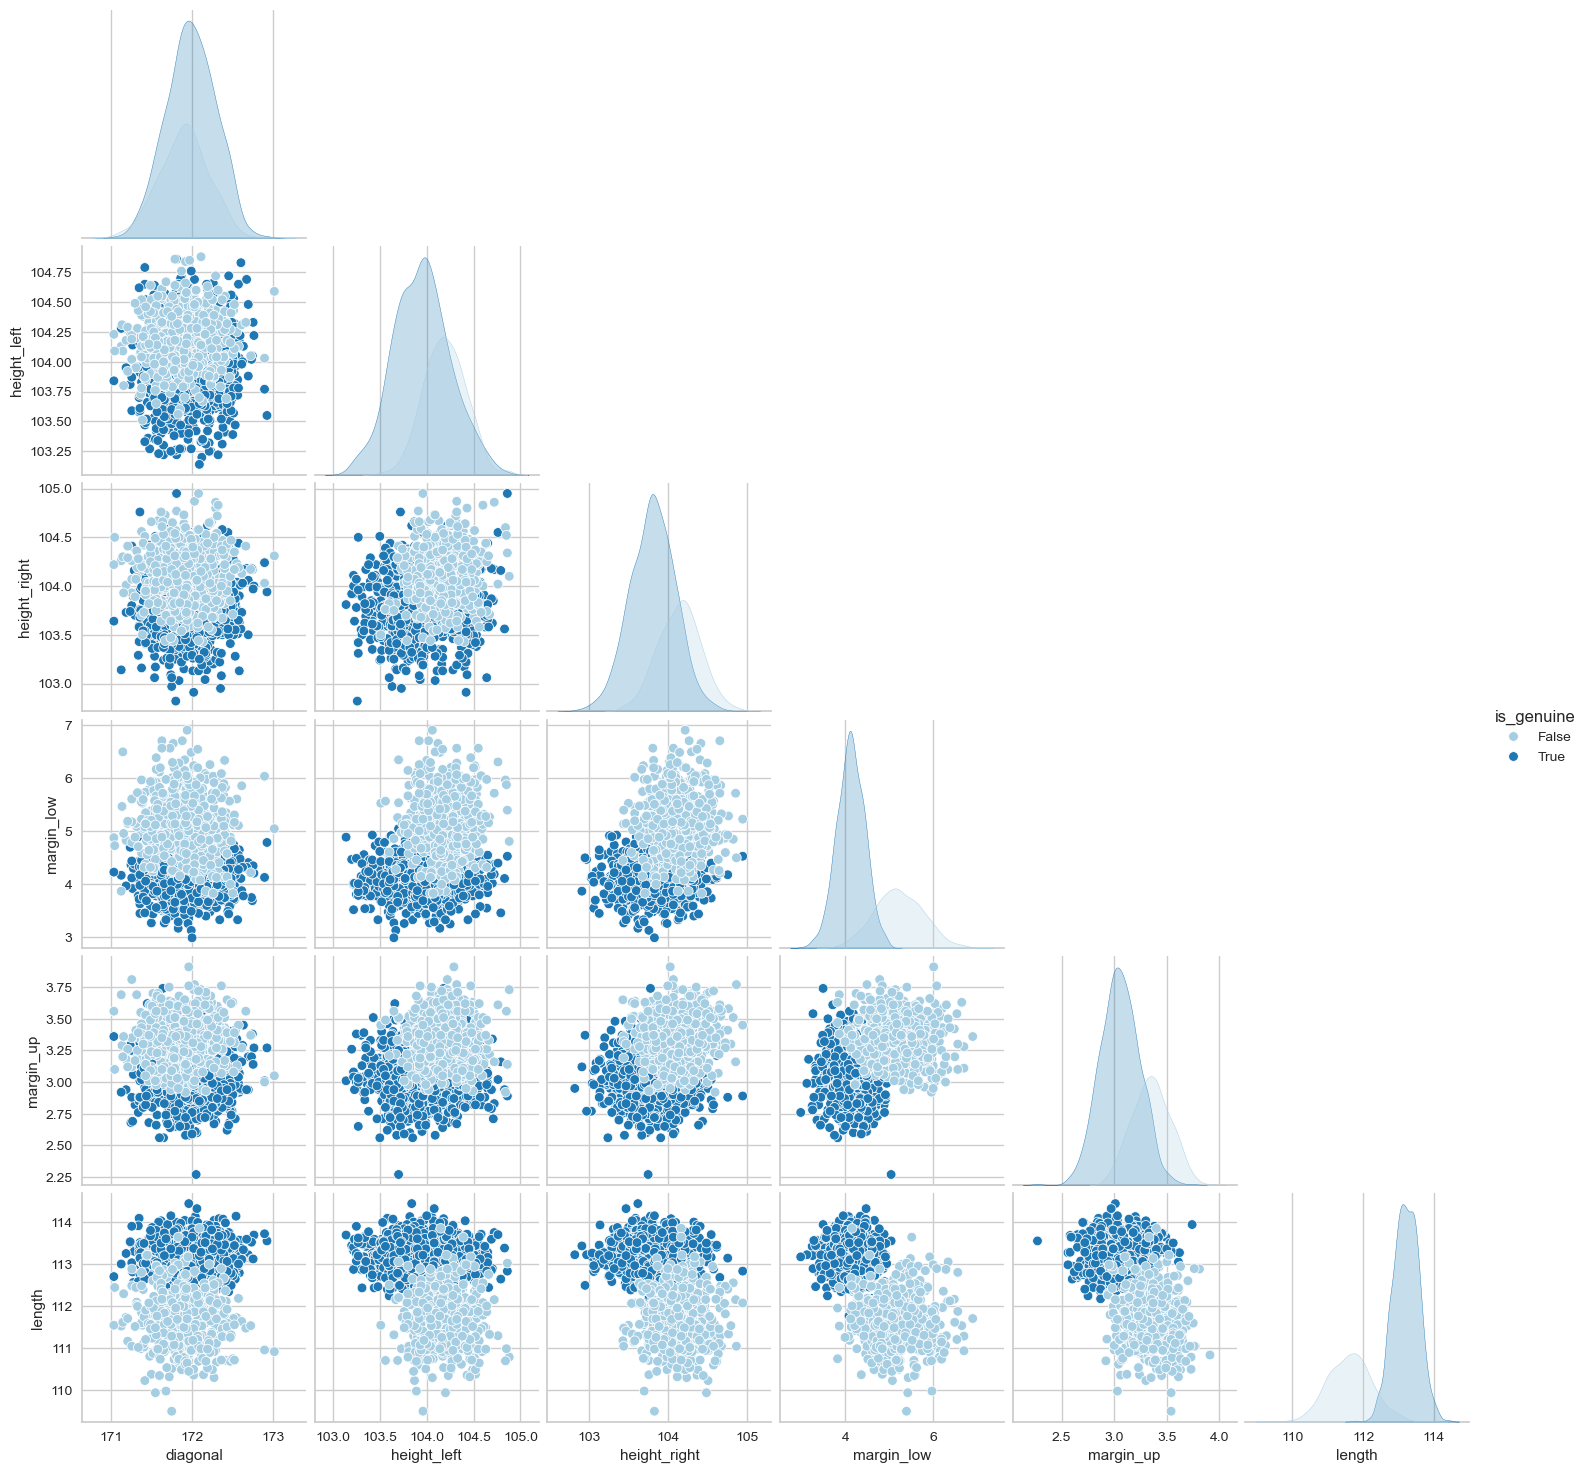

In [436]:
sns.pairplot(data, hue="is_genuine", palette="Paired", corner=True, diag_kind="kde");

## Plotly

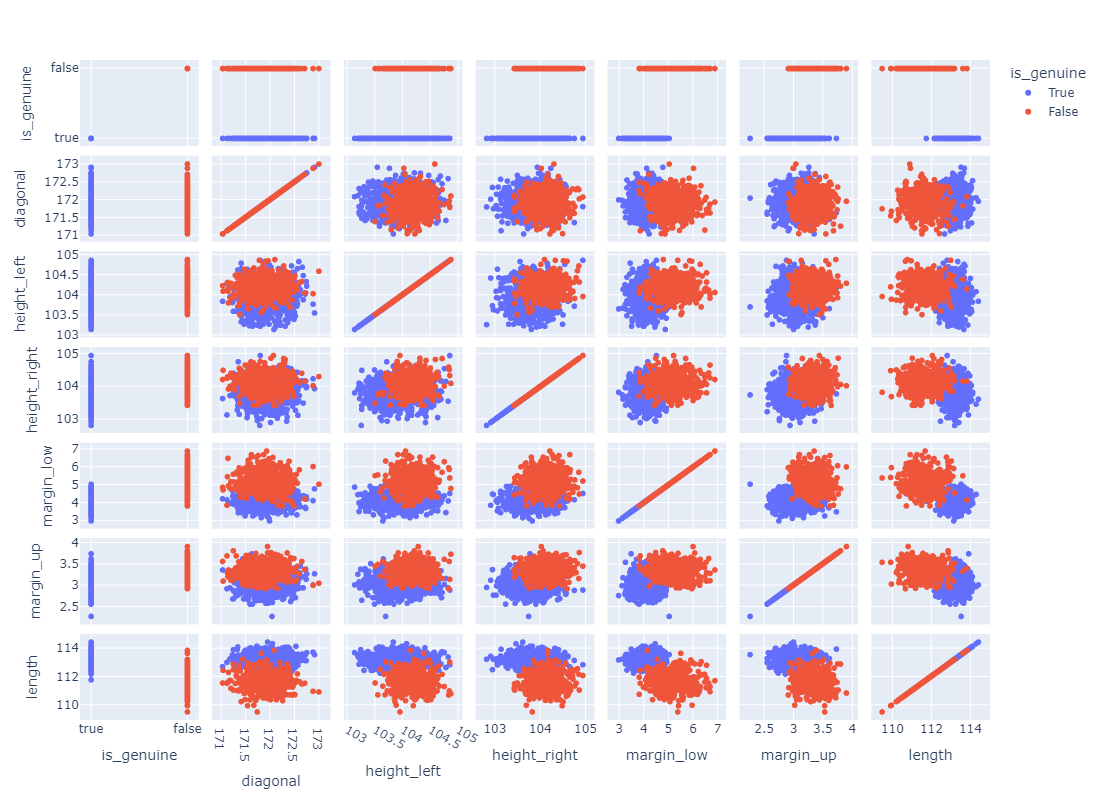

In [438]:
px.scatter_matrix(data,
                  color="is_genuine",
                  width=None,
                  height=800,)

## Corrélation

In [440]:
data.select_dtypes(include=[int, float]).corr(method="pearson")

diagonal  height_left  height_right  margin_low  margin_up  \
diagonal      1.000000     0.019472     -0.024492   -0.111534  -0.055649   
height_left   0.019472     1.000000      0.242279    0.302643   0.246522   
height_right -0.024492     0.242279      1.000000    0.391085   0.307005   
margin_low   -0.111534     0.302643      0.391085    1.000000   0.431606   
margin_up    -0.055649     0.246522      0.307005    0.431606   1.000000   
length        0.097587    -0.320863     -0.401751   -0.666753  -0.520575   

                length  
diagonal      0.097587  
height_left  -0.320863  
height_right -0.401751  
margin_low   -0.666753  
margin_up    -0.520575  
length        1.000000

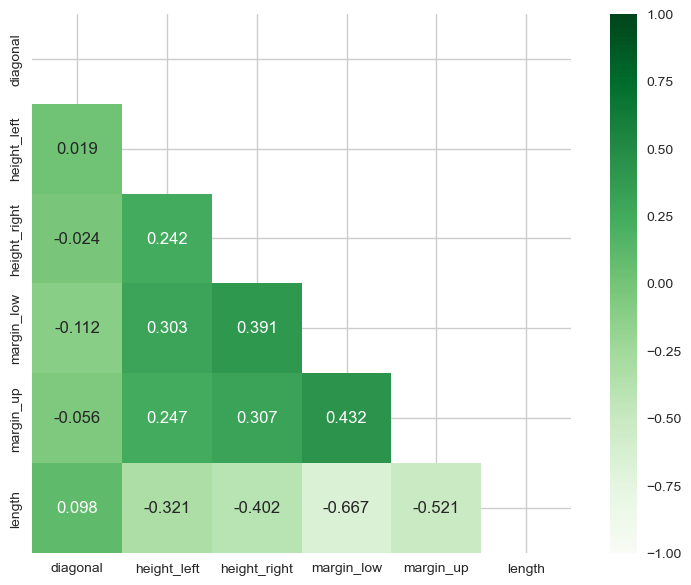

In [441]:
# correlation plot
plt.figure(figsize=(10, 7))
corr = data.select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True,
            fmt='.3f',
            mask=mask,
            cbar=True, vmin=-1, vmax=1);

## Profiling report

In [443]:
# Generate a profile report from a Dataset stored as a pandas `DataFrame`.

profile = ProfileReport(data, title="Profiling Report")
profile.to_notebook_iframe()  # Used to output the HTML representation to a Jupyter notebook.
# profile.to_file("data_report.html")  # Write the report to a file.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [444]:
profile.to_file("data_report.html")  # Write the report to a file.

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Modeling

In [446]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

La variable cible ne doit par avoir de valeurs nulles car il est impossible qu'on billet ne puisse pas avoir de margin_low. Donc, nous allons entrainer et évaluer le modèles sur l'ensemble des données complété à 100%.

Dans ce jeu de données, la seule variable ayant des valeurs manquantes est `margin_low` alors on va faire le filter des valeurs nulles, comme suit:

In [448]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]

data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [449]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

In [450]:
X.head()

diagonal  height_left  height_right  margin_up  length
0    171.81       104.86        104.95       2.89  112.83
1    171.46       103.36        103.66       2.99  113.09
2    172.69       104.48        103.50       2.94  113.16
3    171.36       103.91        103.94       3.01  113.51
4    171.73       104.28        103.46       3.48  112.54

In [451]:
y.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

## Train / Test split

In [453]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


## Standardisation

In [455]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [456]:
X_train

diagonal  height_left  height_right  margin_up  length
1243    171.64       104.20        104.10       3.60  112.72
1348    171.84       104.32        104.50       3.00  111.06
137     171.60       104.02        103.90       3.15  113.15
607     171.91       104.17        103.62       2.89  112.73
1198    172.05       104.20        104.11       3.37  111.18
...        ...          ...           ...        ...     ...
1161    171.92       104.29        104.27       3.13  111.37
1328    172.10       104.22        103.99       3.24  111.94
884     172.57       103.78        103.65       3.04  113.00
1496    172.19       104.63        104.44       3.37  110.97
1157    172.09       103.70        104.27       3.51  112.20

[1024 rows x 5 columns]

In [457]:
X_train_std

array([[-1.07074174,  0.5462928 ,  0.54806196,  1.91843401,  0.05088625],
       [-0.40647448,  0.94600971,  1.77308884, -0.68168479, -1.8514336 ],
       [-1.20359519, -0.05328258, -0.06445149, -0.03165509,  0.54365585],
       ...,
       [ 2.01810103, -0.85271641, -0.83009329, -0.50834354,  0.37175948],
       [ 0.75599323,  1.97861174,  1.58933481,  0.9217218 , -1.95457142],
       [ 0.4238596 , -1.11919435,  1.06869838,  1.52841619, -0.54502117]])

In [458]:
import matplotlib.pyplot as plt

## Ridge

Comme vu dans le chapitre sur la régression ridge, on doit trouver un coefficient de régularisation adapté. Pour rappel, l'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard. 

On appelle ce coefficient alpha, on va en tester `alpha=1.`


In [460]:
# On crée un modèle de régression linéaire
ridge = linear_model.Ridge(alpha=0.01)

# On entraîne ce modèle sur les données d'entrainement
ridge.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test
ridge_error = np.mean((ridge.predict(X_test) - y_test) ** 2)


# On obtient l'erreur quadratique ci-dessous
print(ridge_error)

0.21624489496238977


In [461]:
ridge.coef_

array([-0.08785912,  0.176673  ,  0.26034798,  0.28821604, -0.40493113])

In [462]:
mse = metrics.mean_squared_error(ridge.predict(X_test), y_test)
rmse = np.sqrt(mse)  # metrics.mean_squared_error(ridge.predict(X_test), y_test, squared=False)
mae = metrics.mean_absolute_error(ridge.predict(X_test), y_test)

mse, rmse, mae

(0.21624489496238977, 0.4650213919406179, 0.35638427762847347)

In [463]:
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)
    print(model.coef_)
    
    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

In [464]:
# Train and evaluate ridge regression
ridge_error = train_model(model=linear_model.Ridge(alpha=1.),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

[-0.0870466   0.17575175  0.25871287  0.2829553  -0.40552202]
Model error: 0.21621


## Lasso

In [466]:
# Train and evaluate ridge regression
lasso_error = train_model(model=linear_model.Lasso(fit_intercept=True, alpha=0.000001),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

[-0.08785648  0.17667346  0.26035819  0.28825115 -0.40492859]
Model error: 0.21625


## Elastic-Net

In [468]:
# Train and evaluate ridge regression
elastic_error = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)

[-0.  0.  0.  0. -0.]
Model error: 0.42698


# Exercice 1:

Dans la cellule précédente, veuillez analyser les variables explicatives: que constatez vous entre le jeu de train et le jeu de test?

## Dans cette section, nous allons analyser les variables explicatives de notre modèle.

In [471]:
print("les coeficients des variables explicatives:",elastic_error["estimator"].coef_)

les coeficients des variables explicatives: [-0.  0.  0.  0. -0.]


Nous avons observé que la contribution des variables aléatoires est presque nulle dans l'ensemble. Cela est dû à la nature même de notre modèle Elastic-Net, qui attribue des coefficients nuls aux variables ayant une faible influence. Cela indique que notre choix de paramètre alpha = 1 n'est pas optimal. Nous devrions essayer d'autres valeurs pour améliorer la performance du modèle.

In [473]:
print("l'erreur quadratique moyenne sur les donnees d'entrainement est " ,elastic_error["error_train"],
      "et l'erreur quadratique moyenne sur les donnee test ",elastic_error["error_test"])

l'erreur quadratique moyenne sur les donnees d'entrainement est  0.4460780868530273 et l'erreur quadratique moyenne sur les donnee test  0.42698000593598173


Nous remarquons que le coeficient sont eleve. Ainsi, nous pouvons minimiser ces erreurs avec en choissisant le bon parametre.

## Nous allons tracer des courbes pour visualiser clairement les prédictions sur les données d'entraînement et de test.

In [476]:
y_train_pred_1 =elastic_error["estimator"].predict(X_train)
y_test_pred_1 =elastic_error["estimator"].predict(X_test)

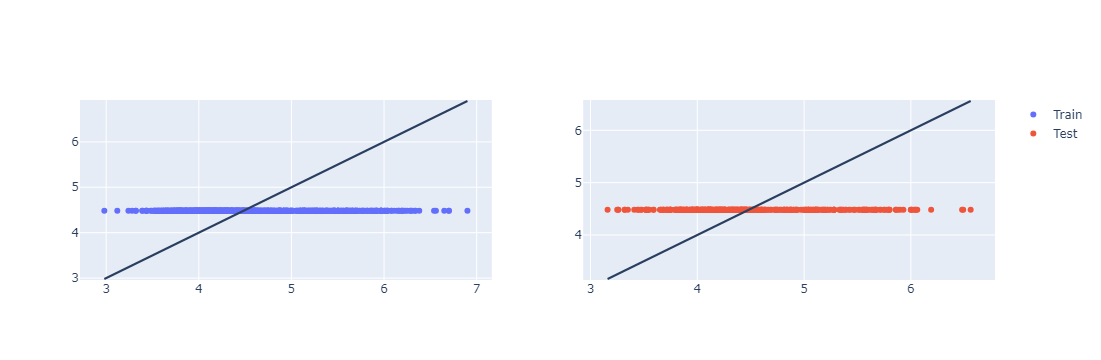

In [477]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False)

for idx, (name, y_true, y_pred) in enumerate([("Train", y_train, y_train_pred_1),
                                              ("Test", y_test, y_test_pred_1),
                                             ]):
    col = idx + 1
    fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode="markers", name=name), row=1, col=col)

    fig.add_shape(type="line",
              x0=y_true.min(), x1=y_true.max(),
              y0=y_true.min(), y1=y_true.max(),
              row=1, col=col)
    
fig.show()

Cette représentation met en évidence un problème avec notre modèle. En effet, on observe que le modèle reste constant sur la période, aussi bien pour les données d'entraînement que pour les données de test. Cela indique que notre modèle est inadéquat.


In [480]:
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

set_config(display="diagram", print_changed_only=True)

In [481]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score

# EXERCIE 2

## 1.modele ridge

Dans le chunk suivant, nous allons définir notre pipeline pour le modèle Ridge. Nous allons explorer plusieurs valeurs de paramètres afin de déterminer celle qui offre la meilleure performance.

In [485]:
# definition du modèle
reg_ridge_pipe = Pipeline(steps=[("scaler",StandardScaler()),
                           ("regressor", linear_model.Ridge()),
                          ])

# La grille de recherche spécifie les valeurs à tester pour les hyperparamètres. 
#Ici, on teste différentes valeurs d'alpha et les options pour ajuster l'intercept.
param_grid_ridge = {
    "regressor__alpha": [0.000000000001,0.01,0.009,0.1, 0.2, 0.3, 0.5,1,1.7],
    "regressor__fit_intercept" : [True, False]
}
#affichage du bon modèle ( modèle ayant le bon score)
grid_search_ridge = GridSearchCV(reg_ridge_pipe, param_grid_ridge, cv=10, scoring="r2", return_train_score=True)



In [486]:
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [1e-12, 0.01, 0.009, 0.1, 0.2, 0.3,
                                              0.5, 1, 1.7],
                         'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

### A cette étape,nous allons faire la representation graphique de nos MSE avec les valeurs de alpha pour mieux voir la tendance

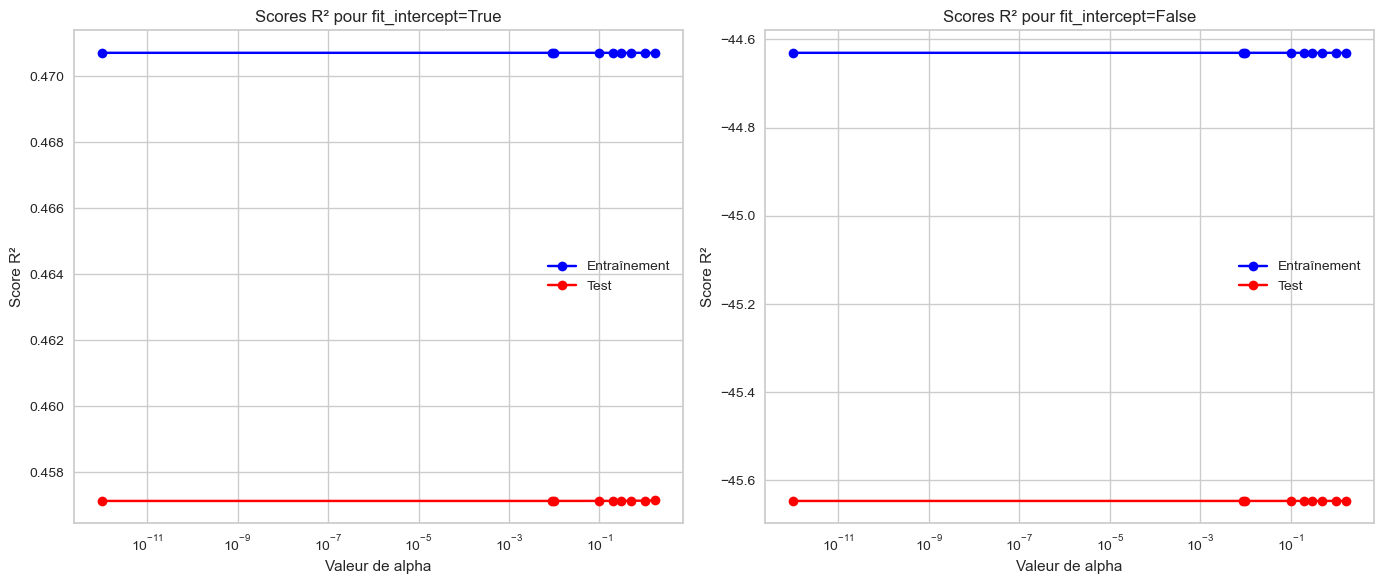

In [487]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supposons que grid_search_lasso est déjà ajusté
results_ridge = pd.DataFrame(grid_search_ridge.cv_results_)

# Extraction des valeurs de alpha, fit_intercept et des scores
alphas_ridge = results_ridge['param_regressor__alpha']
fit_intercepts_ridge = results_ridge['param_regressor__fit_intercept']
mean_test_score_ridge = results_ridge['mean_test_score']
mean_train_score_ridge = results_ridge['mean_train_score']

# Création de deux graphiques pour les différentes valeurs de fit_intercept
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Définir les sous-graphes pour chaque cas de fit_intercept
for i, intercept in enumerate(fit_intercepts_ridge.unique()):
    mask = fit_intercepts_ridge == intercept
    
    # Score R² pour fit_intercept True/False
    ax = axes[i]
    ax.plot(alphas_ridge[mask], mean_train_score_ridge[mask], label='Entraînement', marker='o', color='blue')
    ax.plot(alphas_ridge[mask], mean_test_score_ridge[mask], label='Test', marker='o', color='red')
    ax.set_title(f"Scores R² pour fit_intercept={intercept}")
    ax.set_xlabel("Valeur de alpha")
    ax.set_ylabel("Score R²")
    ax.set_xscale('log')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## Interpretation :
Nous remarquons que nous MSE sont tres que constante sur la plage de valeur que nous avions donnee a notre estimateur alpha.A cela s'ajoute le fait que 

In [489]:
#  ajustement du modèle final avec ces paramètres pour obtenir
#la meilleure performance possible sur les données d'entraînement.


best_params_ridge = grid_search_ridge.best_params_
print(f"Best params: {best_params_ridge}")

Best params: {'regressor__alpha': 1.7, 'regressor__fit_intercept': True}


In [490]:
# coefficient renvoyant le meilleur estimateur
best_ridge_model_ridge = grid_search_ridge.best_estimator_.named_steps["regressor"]
best_ridge_model_ridge

Ridge(alpha=1.7)

In [491]:
best_ridge_model_ridge.coef_

array([-0.02645706,  0.05312125,  0.08507754,  0.06678462, -0.35256868])

### Ce code permet d'afficher les coefficients de chaque variable dans le modèle, en indiquant l'impact de chaque variable sur la prédiction.


In [493]:
# affichage de coefficients du modèle 
df_feature_importance_ridge = pd.DataFrame(best_ridge_model_ridge.coef_, columns=["coef"], index=grid_search_ridge.feature_names_in_)
print(f"Shape: {df_feature_importance_ridge.shape}")
df_feature_importance_ridge.head()

Shape: (5, 1)


coef
diagonal     -0.026457
height_left   0.053121
height_right  0.085078
margin_up     0.066785
length       -0.352569

### Ce code a pour rôle de créer une représentation sous forme de diagramme en barres des coefficients des variables explicatives, afin de visualiser l'impact relatif de chaque variable sur le modèle.

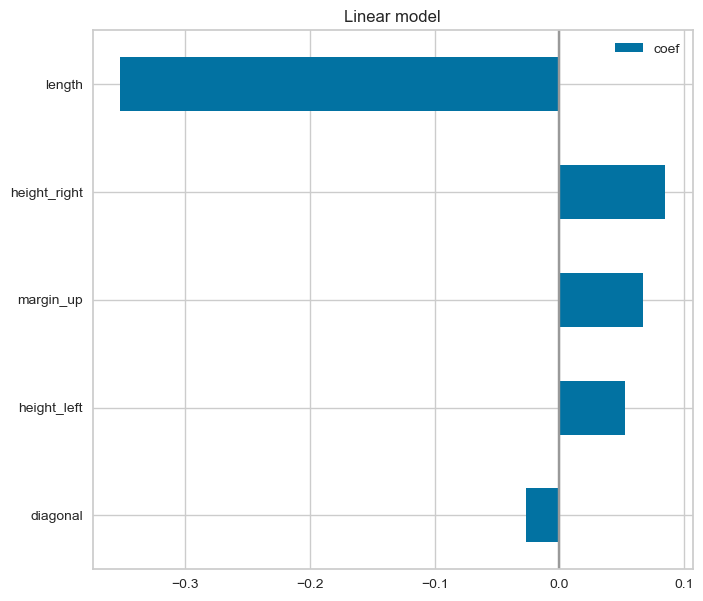

In [495]:
# top30 most important features
(df_feature_importance_ridge
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

### Interpretation

Dans notre modele,la variable length a une contribution élevée en valeur absolue dans notre modèle. elle est suivi par la variable height_right.la variable length contribue négative dans le modele. la variable diagonal est celle qui contribut faible dans le modelele.

## Prediction pour le modele de ridge

In [499]:
y_train_pred_ridge = best_ridge_model_ridge.predict(X_train)
y_test_pred_ridge = best_ridge_model_ridge.predict(X_test)

<Figure size 1000x600 with 0 Axes>

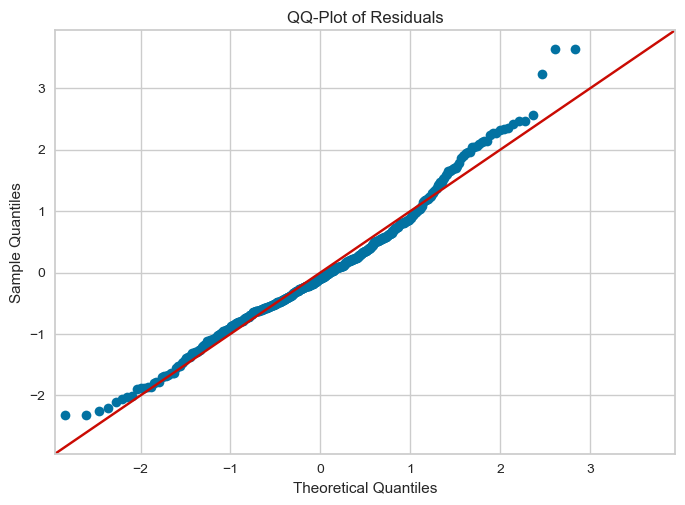

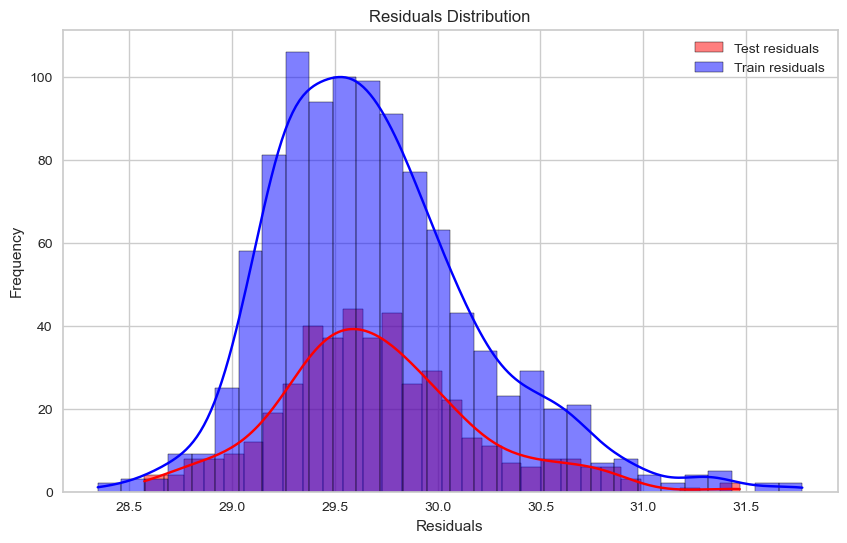

Train R²: -1976.5780, Test R²: -2065.6461
Train MSE: 882.1542, Test MSE: 882.3856


In [500]:


# Calcul des résidus
residuals_train = y_train - y_train_pred_ridge
residuals_test = y_test - y_test_pred_ridge

# Calcul des erreurs (MSE et R²)
mse_train = mean_squared_error(y_train,  y_train_pred_ridge)
mse_test = mean_squared_error(y_test, y_test_pred_ridge)
r2_train = r2_score(y_train,  y_train_pred_ridge)
r2_test = r2_score(y_test,y_test_pred_ridge)



# 2. QQ-plot des résidus
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_test, line ='45', fit=True)
plt.title("QQ-Plot of Residuals")
plt.show()

# 3. Distribution des résidus (Histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, kde=True, color="red", label="Test residuals", bins=30)
sns.histplot(residuals_train, kde=True, color="blue", label="Train residuals", bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 4. Performance du modèle - R² et MSE
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

Dans le premier graphique, nous pouvons conclure que le modèle est performant, car la courbe suit bien la première bisectrice. En examinant les résidus, nous remarquons que la distribution des résidus pour les données d'entraînement et de test est proche de celle d'une loi normale. Cela indique que le modèle ajuste correctement les données.

## 2. Modele Lasso ##

## Dans le chunk suivant, nous allons définir le pipeline pour notre modèle.

In [530]:
#definition du modèle du modele Lasso
reg_lasso_pipe = Pipeline(steps=[("scaler", StandardScaler()),
                           ("regressor", linear_model.Lasso()),
                          ])


# La grille de recherche spécifie les valeurs à tester pour les hyperparamètres. 
#Ici, on teste différentes valeurs d'alpha et les options pour ajuster l'intercept.
param_grid_lasso = {
    "regressor__alpha": [0.0001,0.01,0.02,0.04, 0.3, 0.5,1,1.2,2],
    "regressor__fit_intercept" : [True, False]
}
#affichage du bon modèle ( modèle ayant le bon score)
grid_search_lasso = GridSearchCV(reg_lasso_pipe, param_grid_lasso, cv=10, scoring="r2", return_train_score=True)


#### Nous allons entraîner notre modèle en utilisant le pipeline que nous avons défini.

In [533]:
grid_search_lasso.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [0.0001, 0.01, 0.02, 0.04, 0.3,
                                              0.5, 1, 1.2, 2],
                         'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

### A cette étape,nous allons faire la representation graphique de nos MSE avec les valeurs de alpha pour mieux voir la tendance

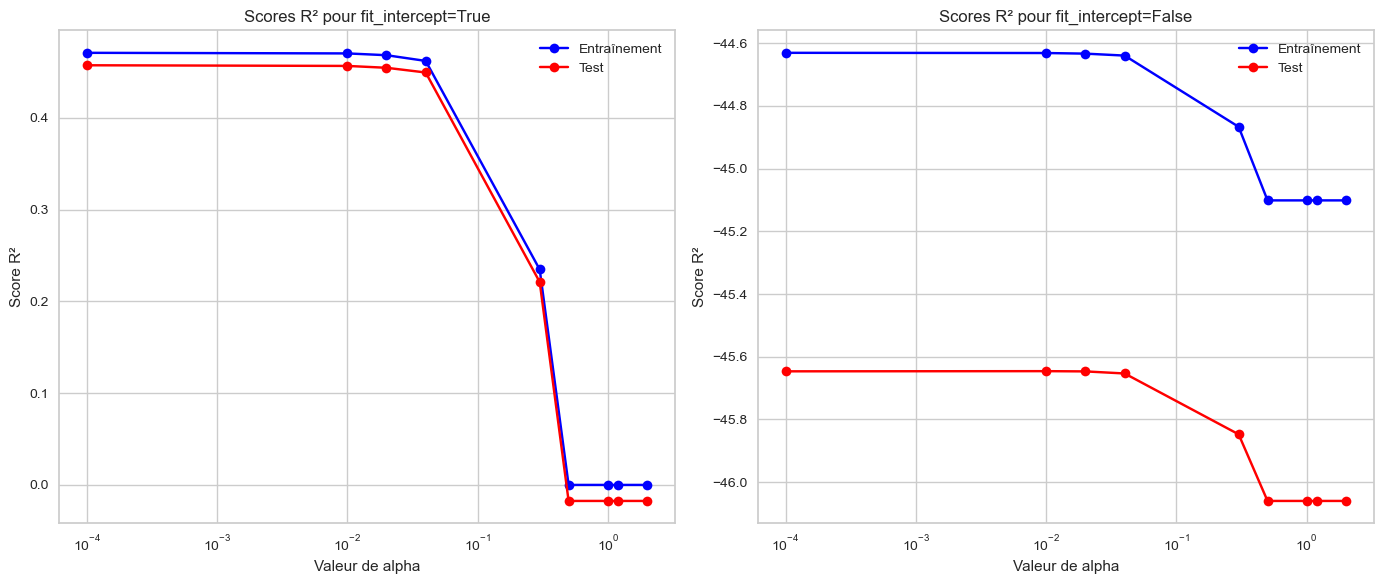

In [536]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supposons que grid_search_lasso est déjà ajusté
results = pd.DataFrame(grid_search_lasso.cv_results_)

# Extraction des valeurs de alpha, fit_intercept et des scores
alphas = results['param_regressor__alpha']
fit_intercepts = results['param_regressor__fit_intercept']
mean_test_score = results['mean_test_score']
mean_train_score = results['mean_train_score']

# Création de deux graphiques pour les différentes valeurs de fit_intercept
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Définir les sous-graphes pour chaque cas de fit_intercept
for i, intercept in enumerate(fit_intercepts.unique()):
    mask = fit_intercepts == intercept
    
    # Score R² pour fit_intercept True/False
    ax = axes[i]
    ax.plot(alphas[mask], mean_train_score[mask], label='Entraînement', marker='o', color='blue')
    ax.plot(alphas[mask], mean_test_score[mask], label='Test', marker='o', color='red')
    ax.set_title(f"Scores R² pour fit_intercept={intercept}")
    ax.set_xlabel("Valeur de alpha")
    ax.set_ylabel("Score R²")
    ax.set_xscale('log')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


En visualisant les graphiques, on remarque que plus la valeur de alpha est proche de 0, plus le score est élevé. Nous observons également une disparité entre les cas où l'on inclut un intercept ou non. Toutefois, dans le cas où l'intercept est présent, le modèle semble donner de meilleurs résultats.

## entrer le modele avec le meileur modele

In [540]:
grid_search_lasso.fit(X_train, y_train)

best_params_lasso = grid_search_lasso.best_params_
print(f"Best params: {best_params_lasso}")

Best params: {'regressor__alpha': 0.0001, 'regressor__fit_intercept': True}


In [541]:
best_lasso_model_lasso = grid_search_lasso.best_estimator_.named_steps["regressor"]
best_lasso_model_lasso.coef_

array([-0.02636105,  0.05297749,  0.08495824,  0.06647086, -0.35332241])

## Faire la prediction avec les donnee d'entrainement et les donnees de test

In [514]:
y_train_pred_lasso = best_lasso_model_lasso.predict(X_train)
y_test_pred_lasso = best_lasso_model_lasso.predict(X_test)

## Dans ce code, nous allons affiche les coefficients des variables explicatives

In [516]:
# affichage de coefficients du modèle 
df_feature_importance_lasso = pd.DataFrame(best_lasso_model_lasso.coef_, columns=["coef"], index=grid_search_lasso.feature_names_in_)
print(f"Shape: {df_feature_importance_lasso.shape}")
df_feature_importance_lasso.head()

Shape: (5, 1)


coef
diagonal     -0.026455
height_left   0.053042
height_right  0.085015
margin_up     0.066521
length       -0.353345

## Ici, il s'agit de faire une representation graphique des coefficients

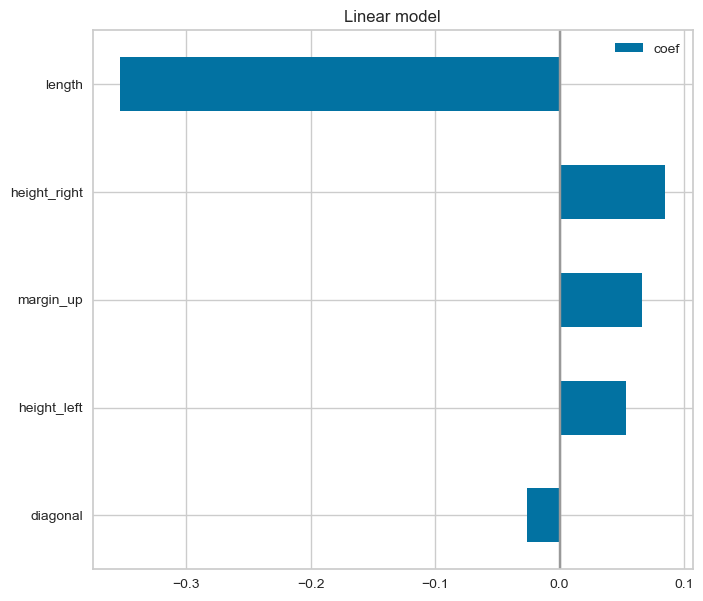

In [519]:
# top30 most important features
(df_feature_importance_lasso
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

Dans ce modèle, la variable length a une forte contribution, tandis que la variable diagonal contribue le moins. Les autres variables ont une contribution relativement faible.

### Représentation graphique pour visualiser les résidus corrigés

<Figure size 1000x600 with 0 Axes>

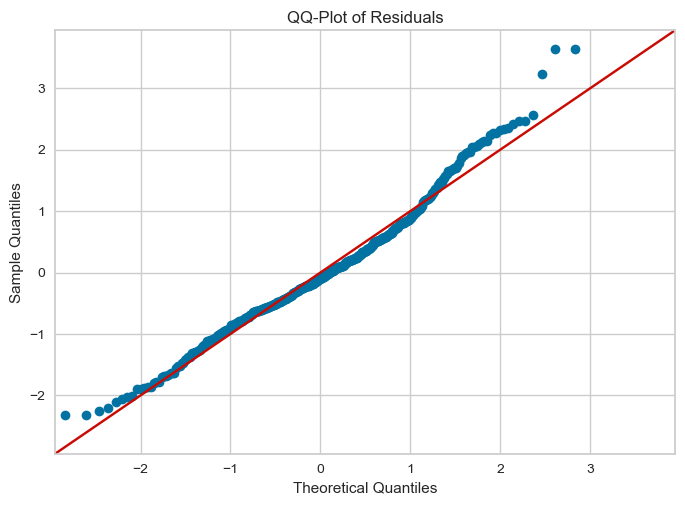

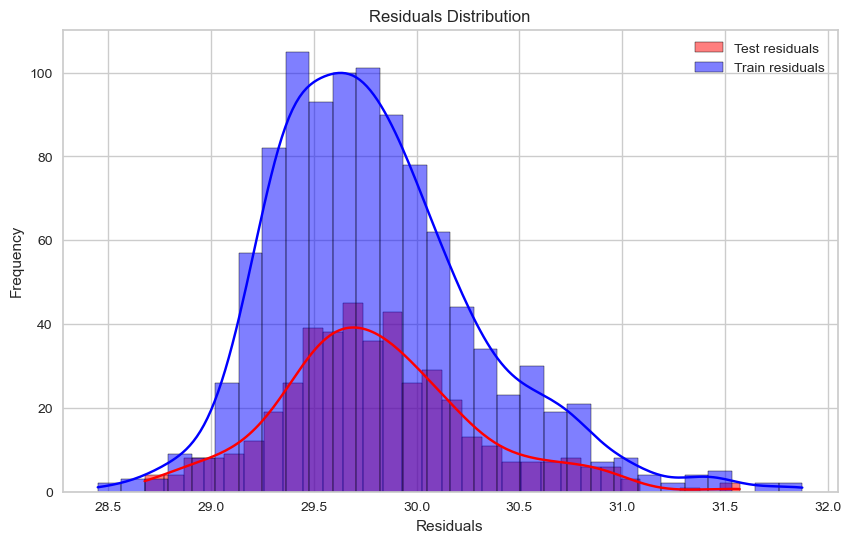

Train R²: -1990.2812, Test R²: -2079.9638
Train MSE: 888.2669, Test MSE: 888.4987


In [522]:


# Calcul des résidus
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_pred_lasso

# Calcul des erreurs (MSE et R²)
mse_train = mean_squared_error(y_train,y_train_pred_lasso)
mse_test = mean_squared_error(y_test, y_test_pred_lasso)
r2_train = r2_score(y_train, y_train_pred_lasso)
r2_test = r2_score(y_test,y_test_pred_lasso)

# Création des graphes



# 2. QQ-plot des résidus
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_test, line ='45', fit=True)
plt.title("QQ-Plot of Residuals")
plt.show()

# 3. Distribution des résidus (Histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, kde=True, color="red", label="Test residuals", bins=30)
sns.histplot(residuals_train, kde=True, color="blue", label="Train residuals", bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 4. Performance du modèle - R² et MSE
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

Dans le premier graphique, nous pouvons conclure que le modèle est performant, car la courbe suit bien la première bisectrice. En examinant les résidus, nous remarquons que la distribution des résidus pour les données d'entraînement et de test est proche de celle d'une loi normale. Cela indique que le modèle ajuste correctement les données.